In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import stats

import seaborn as sns

RANDOM_STATE = 42

## Data Exploration

### Preprocessing

In [2]:
data_folder = 'archive/'
df1 = pd.read_csv(data_folder + "genres_v2.csv", delimiter=',', header=0, 
                  dtype={'danceability':'float', 'energy':'float', 'key':'int', 'loudness':'float', 'mode':'int', 'speechiness':'float',
                         'acousticness':'float', 'instrumentalness':'float', 'liveness':'float', 'valence':'float', 'tempo':'float',
                         'type':'str', 'id':'str', 'uri':'str', 'track_href':'str', 'analysis_url':'str', 'duration_ms':'int','time_signature':'int', 
                         'genre':'str', 'song_name':'str', 'Unnamed: 0':'float', 'title':'str'})
df2 = pd.read_csv(data_folder + "playlists.csv", delimiter=',', header=0)

In [3]:
df1.describe(include='all')

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,...,42305,42305,42305,42305,42305.000000,42305.000000,42305,21519,20780.000000,20780
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35877,35877,35877,35877,NaN,NaN,15,15439,NaN,132
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7D5qMGajdfznFcXFArk5VE,spotify:track:7D5qMGajdfznFcXFArk5VE,https://api.spotify.com/v1/tracks/7D5qMGajdfzn...,https://api.spotify.com/v1/audio-analysis/7D5q...,NaN,NaN,Underground Rap,Forever,NaN,Euphoric Hardstyle
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,9,9,9,NaN,NaN,5875,14,NaN,1398
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,...,NaN,NaN,NaN,NaN,250865.846685,3.972580,NaN,NaN,10483.970645,NaN
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,...,NaN,NaN,NaN,NaN,102957.713571,0.268342,NaN,NaN,6052.359519,NaN
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,...,NaN,NaN,NaN,NaN,25600.000000,1.000000,NaN,NaN,0.000000,NaN
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,...,NaN,NaN,NaN,NaN,179840.000000,4.000000,NaN,NaN,5255.750000,NaN
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,...,NaN,NaN,NaN,NaN,224760.000000,4.000000,NaN,NaN,10479.500000,NaN
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,...,NaN,NaN,NaN,NaN,301133.000000,4.000000,NaN,NaN,15709.250000,NaN


In [4]:
df1['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [5]:
df1['time_signature'].unique()

array([4, 3, 5, 1])

In [6]:
df1['title'].unique()[:20]

array([nan, 'Dirtybird Players', 'Tech House Movement', 'tech house',
       'Tech House Bangerz', 'blanc | Tech House', 'Toolroom Tech House',
       'Tech house', 'Dirtybird//Techhouse by Mack\\',
       'BOILER ROOM TECHNO HOUSE', 'Tech House Music 2020',
       'Tech House 2020 - Best of Techno', 'Tech House Rotation 2020',
       'Dirtybird House', 'Tech House Essentials by Distortion',
       'Tech House', 'Tech House 2020', 'Tech House by DOT Dance',
       'Beatoirt Best New Tech House', 'Tech House Elrow Secrets'],
      dtype=object)

#### Dealing with missing values

array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>],
       [<Axes: title={'center': 'time_signature'}>,
        <Axes: title={'center': 'Unnamed: 0'}>, <Axes: >, <Axes: >]],
      dtype=object)

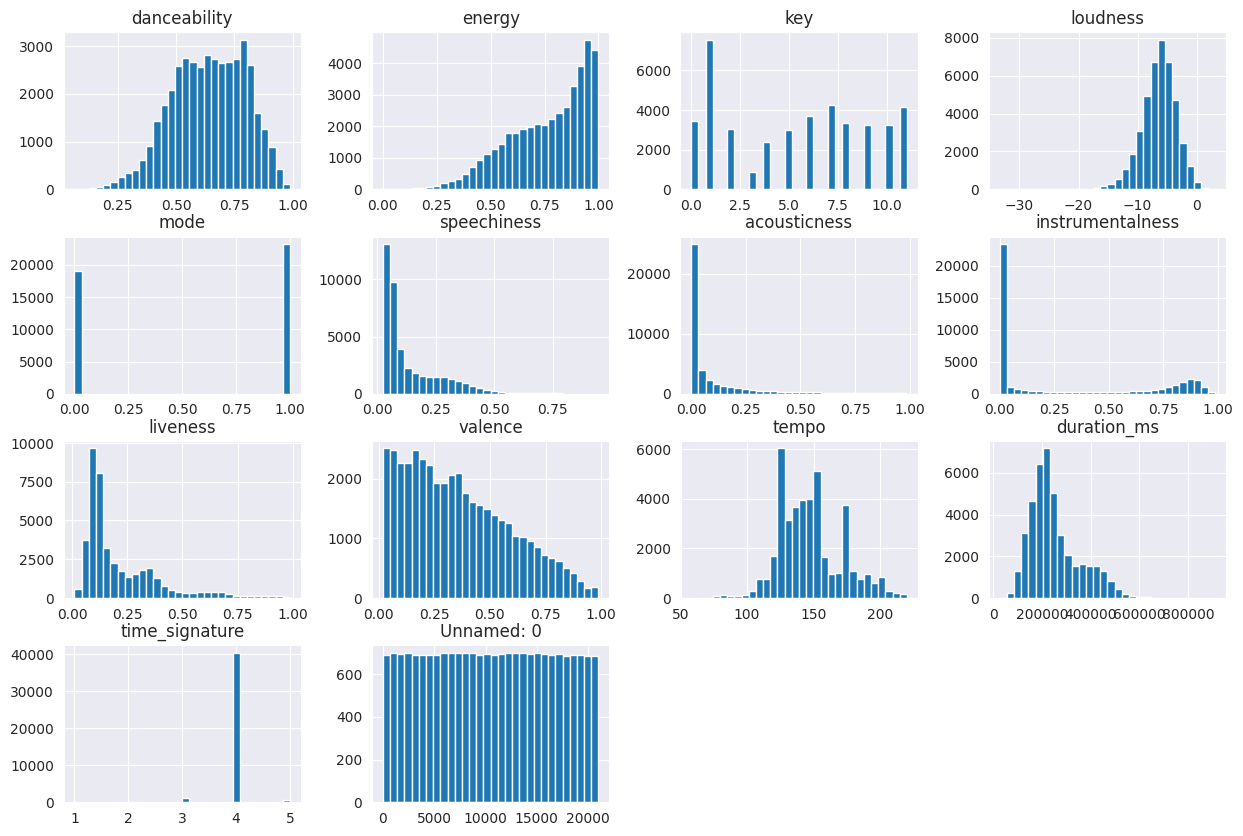

In [8]:
df1.hist(bins=30, figsize=(15, 10))

In [9]:
df1.shape

(42305, 22)

In [10]:
df1.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [11]:
## Finding out the meaning behind the unnamed column
# checking if all non-missing values of the empty column are integer
print('all_integer', np.array_equal(df1['Unnamed: 0'].notnull(), df1['Unnamed: 0'].notnull().astype(int)))

# checking  if missing values are at the same spots for 'title' and 'Unnamed'
print('same_spots', df1.loc[df1['title'].isna(), 'Unnamed: 0'].isna().all())

# renaming the column to a meaning we think it is
df1 = df1.rename(columns={"Unnamed: 0":"view_count"})

all_integer True
same_spots True


#### Dealing with duplicates

In [12]:
df1['track_href'].value_counts()

track_href
https://api.spotify.com/v1/tracks/7D5qMGajdfznFcXFArk5VE    9
https://api.spotify.com/v1/tracks/5cRDn5aGMLvWsldoRmOOz0    8
https://api.spotify.com/v1/tracks/5lXY6PTuWXOludKy4zDQwM    8
https://api.spotify.com/v1/tracks/3BSuC9Y6MhalaLlhyNbTYZ    8
https://api.spotify.com/v1/tracks/2KVv2zAjDHxymySY5EIaAz    7
                                                           ..
https://api.spotify.com/v1/tracks/6hEHxpZpvZwt1v4NoGwjKr    1
https://api.spotify.com/v1/tracks/5TvdhNXoHbeGeWtjCYhFuy    1
https://api.spotify.com/v1/tracks/0PIhZHuUMkxYIueyOJ9rSh    1
https://api.spotify.com/v1/tracks/2V28RKTOabMKk2xvIDyCEz    1
https://api.spotify.com/v1/tracks/6MAAMZImxcvYhRnxDLTufD    1
Name: count, Length: 35877, dtype: int64

In [13]:
df1['id'].value_counts()

id
7D5qMGajdfznFcXFArk5VE    9
5cRDn5aGMLvWsldoRmOOz0    8
5lXY6PTuWXOludKy4zDQwM    8
3BSuC9Y6MhalaLlhyNbTYZ    8
2KVv2zAjDHxymySY5EIaAz    7
                         ..
6hEHxpZpvZwt1v4NoGwjKr    1
5TvdhNXoHbeGeWtjCYhFuy    1
0PIhZHuUMkxYIueyOJ9rSh    1
2V28RKTOabMKk2xvIDyCEz    1
6MAAMZImxcvYhRnxDLTufD    1
Name: count, Length: 35877, dtype: int64

In [14]:
# removing duplicate columns
df1 = df1.drop(columns=['uri', 'track_href', 'analysis_url'])

# removing columns with many missing values
df1 = df1.drop(columns=["view_count", "title", "song_name"])

In [15]:
# the columns values are the same for all rows with the same 'id'
df1.loc[df1['id'] == '7D5qMGajdfznFcXFArk5VE']

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,genre
37044,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
37486,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
37623,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
37723,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
38037,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
38051,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
38351,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
38499,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb
39282,0.447,0.931,5,-3.879,0,0.0509,0.0475,0.225,0.283,0.141,173.992,audio_features,7D5qMGajdfznFcXFArk5VE,179561,4,dnb


In [16]:
# remove rows with duplicates of "id"
df1 = df1.drop_duplicates(subset=['id'])

#### Checking Outliers

In [17]:
df1.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,genre
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,2Vc6NJ9PW9gD9q343XFRKx,124539,4,Dark Trap
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,7pgJBLVz5VmnL7uGHmRj6p,224427,4,Dark Trap
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,0vSWgAlfpye0WCGeNmuNhy,98821,4,Dark Trap
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,0VSXnJqQkwuH2ei1nOQ1nu,123661,3,Dark Trap
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,4jCeguq9rMTlbMmPHuO7S3,123298,4,Dark Trap


In [18]:
df1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'duration_ms', 'time_signature', 'genre'],
      dtype='object')

In [19]:
df1.time_signature.unique()

array([4, 3, 5, 1])

In [20]:
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

for column  in columns:
    Q1 = df1[column].quantile(0.25)
    Q3 = df1[column].quantile(0.75)
    IQR = Q3 - Q1

    small_outliers = df1[column] < (Q1 - 1.5 * IQR)
    big_outliers = df1[column] > (Q3 + 1.5 * IQR)

    print(column, sum(small_outliers), sum(big_outliers))

danceability 42 0
energy 124 0
key 0 0
loudness 631 41
mode 0 0
speechiness 0 1755
acousticness 0 4465
instrumentalness 0 0
liveness 0 2097
valence 0 0
tempo 92 200
duration_ms 0 767
time_signature 1190 438


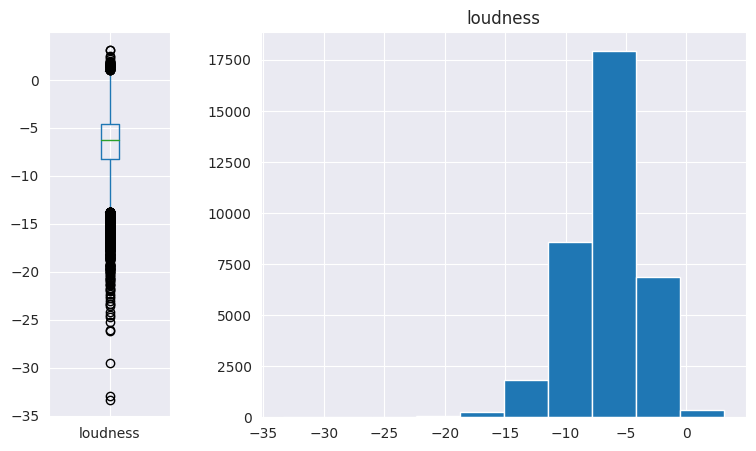

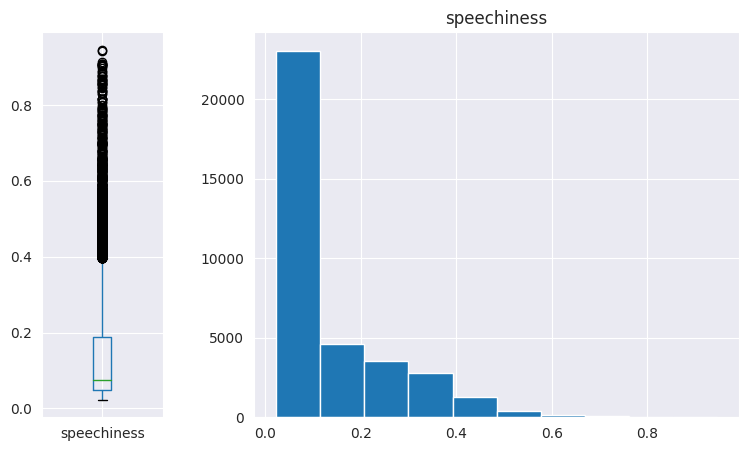

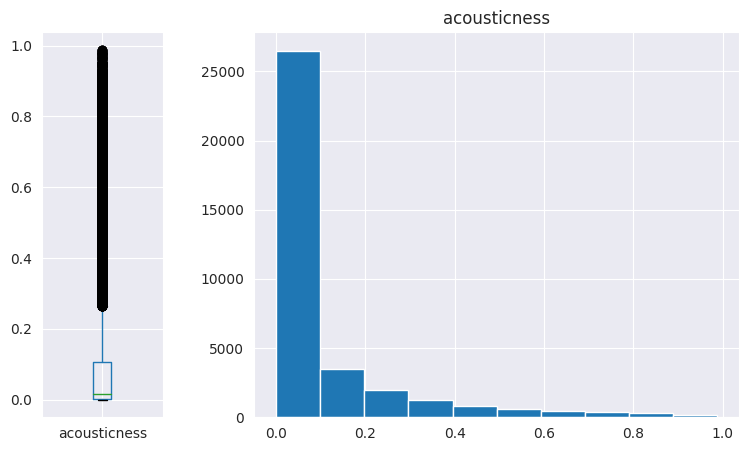

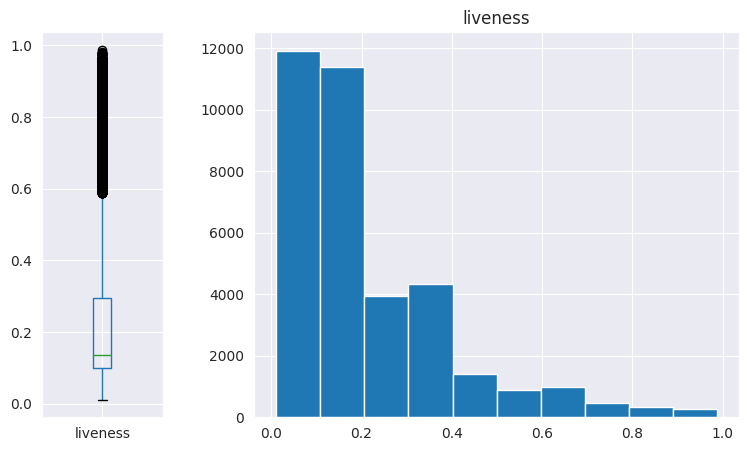

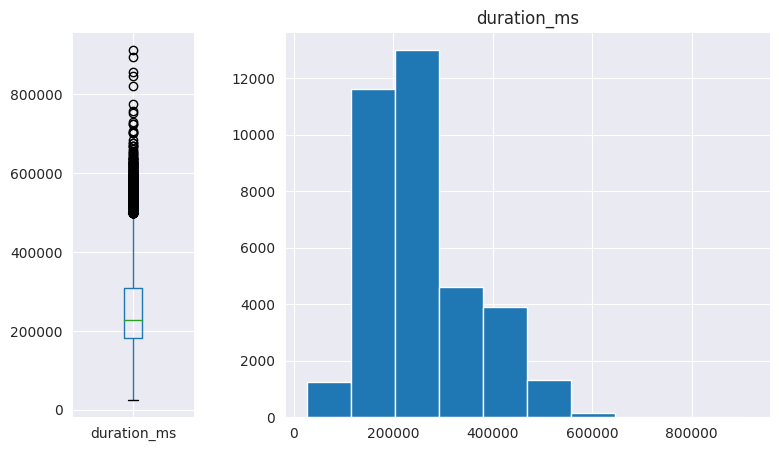

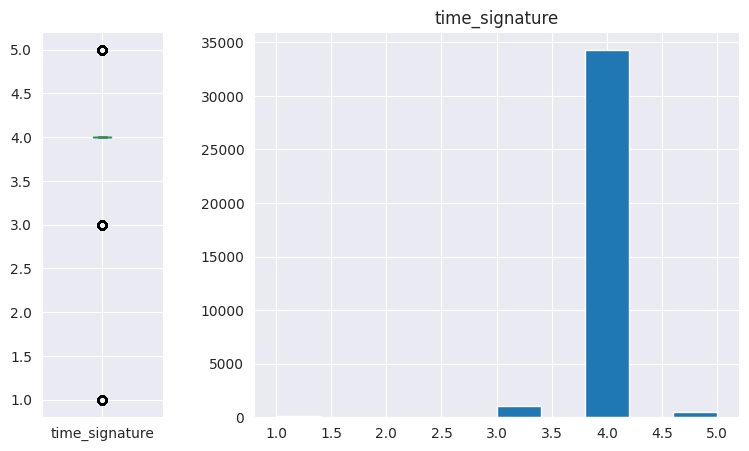

In [21]:
many_outliers = ['loudness', 'speechiness', 'acousticness', 'liveness', 'duration_ms', 'time_signature']
for column in many_outliers:
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(9,5))
    df1.boxplot(column=column,ax=axes[0]);
    df1.hist(column=column, ax=axes[1]);

In [22]:
z_score = stats.zscore(df1['loudness'])

/tmp/ipykernel_4768/3506744501.py:1: DeprecationWarning: Please use `zscore` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  z_score = stats.zscore(df1['loudness'])


In [23]:
(z_score > 1.5).sum()

1766

In [24]:
df1.dtypes

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
id                   object
duration_ms           int64
time_signature        int64
genre                object
dtype: object

In [25]:
# converting categorical variables into object from int
df1.key = df1.key.astype('object')
df1['mode'] = df1['mode'].astype('object')
df1.time_signature = df1.time_signature.astype('object')

In [26]:
df1.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'duration_ms', 'time_signature', 'genre'],
      dtype='object')

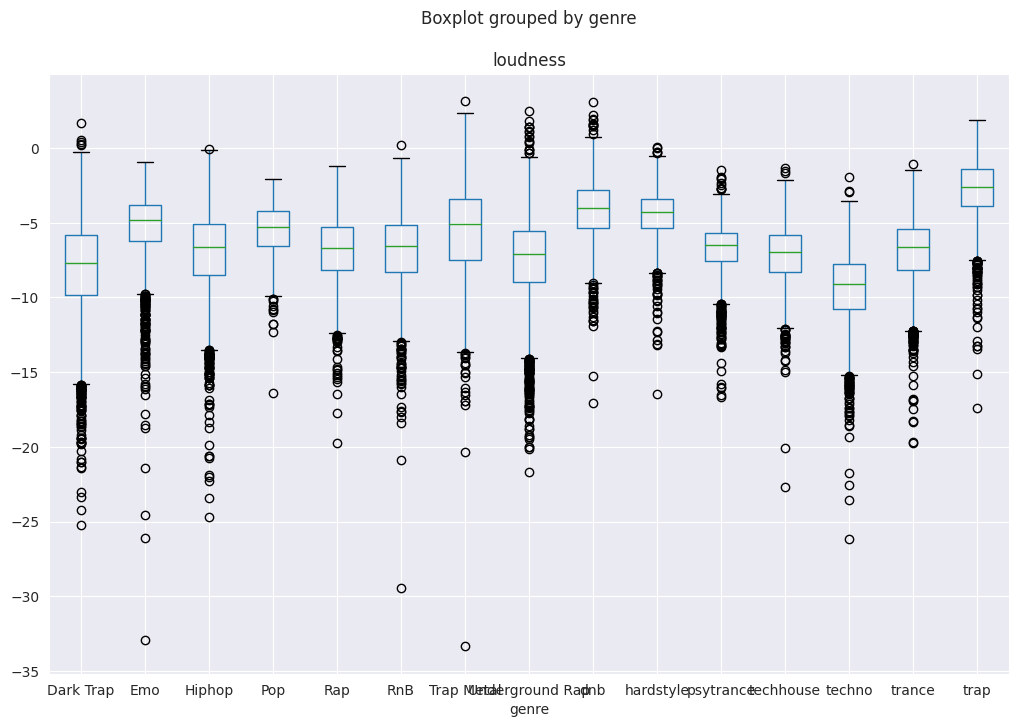

In [27]:
df1.boxplot(column='loudness',
                   by='genre',
                   figsize=(12,8));

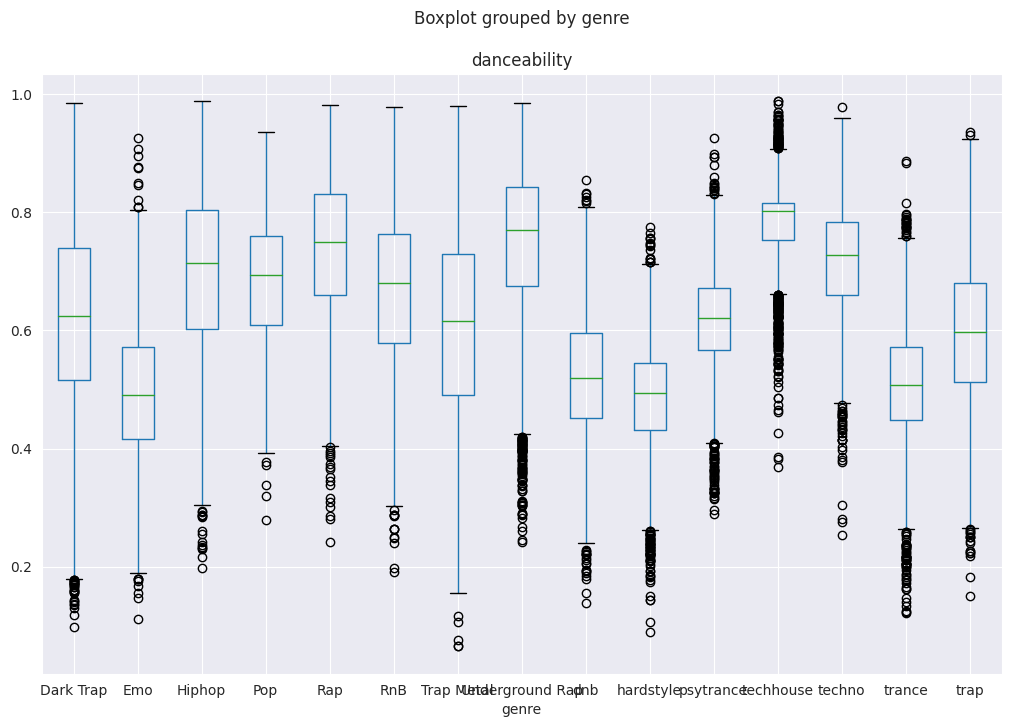

In [28]:
df1.boxplot(column='danceability',
                   by='genre',
                   figsize=(12,8));

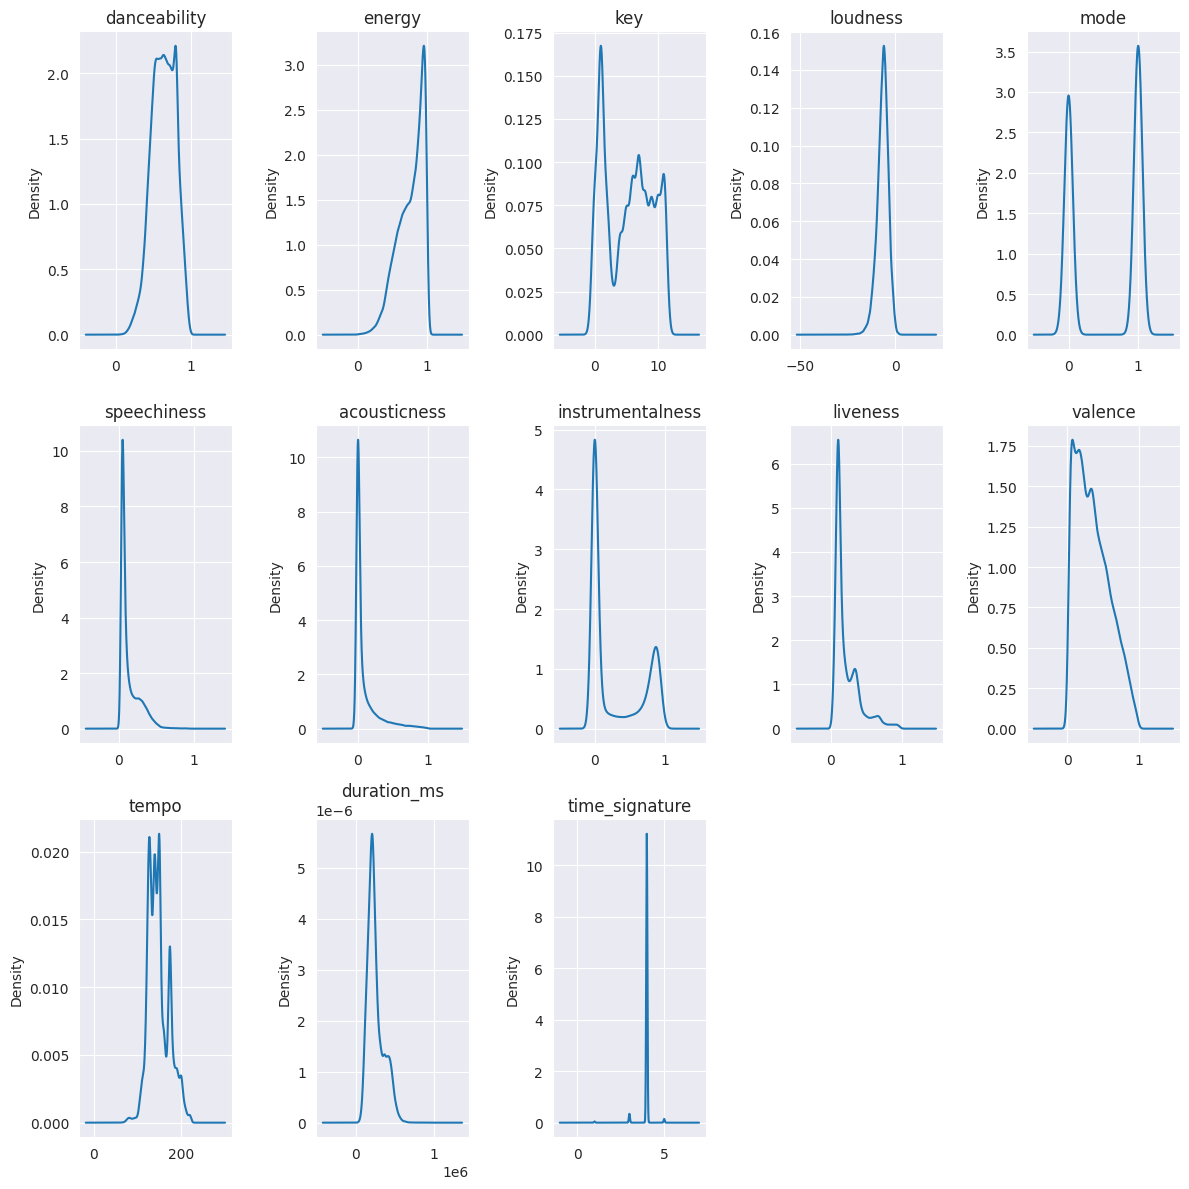

In [29]:
fig = plt.figure(figsize=(12,12))
columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
           'duration_ms', 'time_signature']
for i, column in enumerate(columns):
    ax = fig.add_subplot(3, 5, i+1)
    df1[column].plot.kde()
    plt.title(column)
fig.tight_layout()

In [30]:
np.random.seed(RANDOM_STATE)
df = df1.sample(frac=1).reset_index(drop=True)

In [31]:
df.to_csv("archive/genres_v3.csv")

In [32]:
df = pd.read_csv("archive/genres_v3.csv")

In [33]:
df.sample(9)

,Unnamed: 0,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature,genre
7689,7689,0.631,0.463,0,-8.796,1,0.1100,0.443000,0.000012,0.1880,0.183,132.017,audio_features,1yt2ThVogskpgYVjxBP50g,176093,4,Underground Rap
1217,1217,0.562,0.964,1,-6.983,0,0.0610,0.000061,0.932000,0.8560,0.449,132.980,audio_features,2K0KFTAKoPdBM7tSCgIjey,351000,5,techno
3707,3707,0.811,0.757,0,-6.447,1,0.2300,0.298000,0.000000,0.1030,0.565,130.996,audio_features,6YWPPvDvfsUixbZKsdt6fe,246596,4,Hiphop
21733,21733,0.458,0.946,7,-3.972,1,0.0398,0.003870,0.793000,0.1150,0.421,175.024,audio_features,6CZ7WwFATVGOh7WpHG3q6j,384004,4,dnb
20324,20324,0.912,0.518,6,-11.521,1,0.2220,0.062100,0.000006,0.2390,0.470,106.963,audio_features,5D0buxpjJlpDaQfd6nfqHW,158433,4,Underground Rap
3108,3108,0.479,0.822,7,-11.746,1,0.0501,0.002080,0.463000,0.4290,0.196,129.962,audio_features,24npBKZ2P7YIxSZGxfETl7,206690,4,trance
18621,18621,0.483,0.361,2,-10.610,1,0.0297,0.604000,0.000000,0.1110,0.421,135.262,audio_features,55jZxpp3ER7igeE5tKu0nE,316987,4,Emo
22836,22836,0.384,0.787,8,-5.861,0,0.3350,0.142000,0.000028,0.3900,0.544,169.700,audio_features,5WmxGs0hBmoo9bcGlY0twV,204707,4,Hiphop
30732,30732,0.777,0.877,11,-8.664,0,0.0731,0.000485,0.868000,0.0865,0.329,122.987,audio_features,0GamLelmkb9PfK59OXVVLI,366953,4,techhouse


#### Converting Categorical Variables into Numerical

In [34]:
key_dummies = pd.get_dummies(df.key, prefix="key")
df = pd.concat([df, key_dummies], axis='columns')
df = df.drop(['key'], axis='columns')

dummies = pd.get_dummies(df.time_signature, prefix="signature")
df = pd.concat([df, dummies], axis='columns')
df = df.drop(['time_signature'], axis='columns')
df.to_csv("archive/genres_dummyKey.csv")

In [35]:
df.sample(10)

,Unnamed: 0,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,key_6,key_7,key_8,key_9,key_10,key_11,signature_1,signature_3,signature_4,signature_5
14830,14830,0.362,0.909,-2.542,0,0.0773,0.005180,0.0000,0.9540,0.3190,...,False,False,False,False,False,True,False,False,True,False
13327,13327,0.754,0.676,-9.917,1,0.2660,0.033900,0.9160,0.1070,0.0409,...,False,False,False,False,False,False,False,False,True,False
32896,32896,0.605,0.735,-4.431,0,0.0763,0.159000,0.0000,0.0872,0.5010,...,False,False,False,True,False,False,False,False,False,True
18687,18687,0.554,0.965,-4.635,1,0.0759,0.000568,0.6080,0.0556,0.3400,...,False,False,False,True,False,False,False,False,True,False
5524,5524,0.533,0.980,-5.030,1,0.0928,0.000062,0.4440,0.8170,0.3710,...,False,True,False,False,False,False,False,False,True,False
30755,30755,0.795,0.668,-6.138,1,0.2400,0.015400,0.0000,0.3000,0.2310,...,False,False,True,False,False,False,False,False,True,False
4374,4374,0.802,0.664,-8.031,1,0.0427,0.000284,0.8760,0.0730,0.4120,...,False,False,False,False,False,False,False,False,True,False
16149,16149,0.645,0.418,-10.065,0,0.2900,0.558000,0.0003,0.5620,0.1230,...,True,False,False,False,False,False,False,False,True,False
4975,4975,0.739,0.947,-7.654,1,0.0590,0.000112,0.5610,0.2910,0.8290,...,False,False,False,False,False,False,False,False,True,False
19089,19089,0.742,0.510,-9.214,1,0.0462,0.006200,0.0000,0.2160,0.1020,...,False,False,False,False,False,False,False,False,True,False


## Classification into Genres

In [36]:
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold, train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from numpy import arange
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB

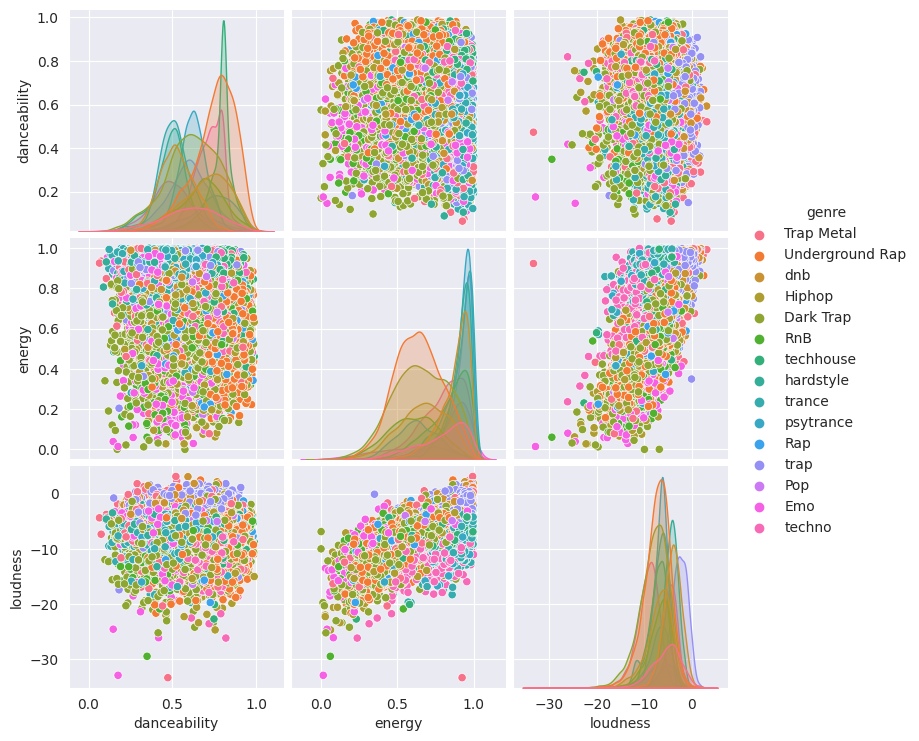

In [37]:
# columns = ['danceability', 'energy', 'loudness', 'speechiness',
#            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
#            'duration_ms','genre']
columns = ['danceability', 'energy', 'loudness', 'genre']
sns.pairplot(data=df[columns], hue='genre')

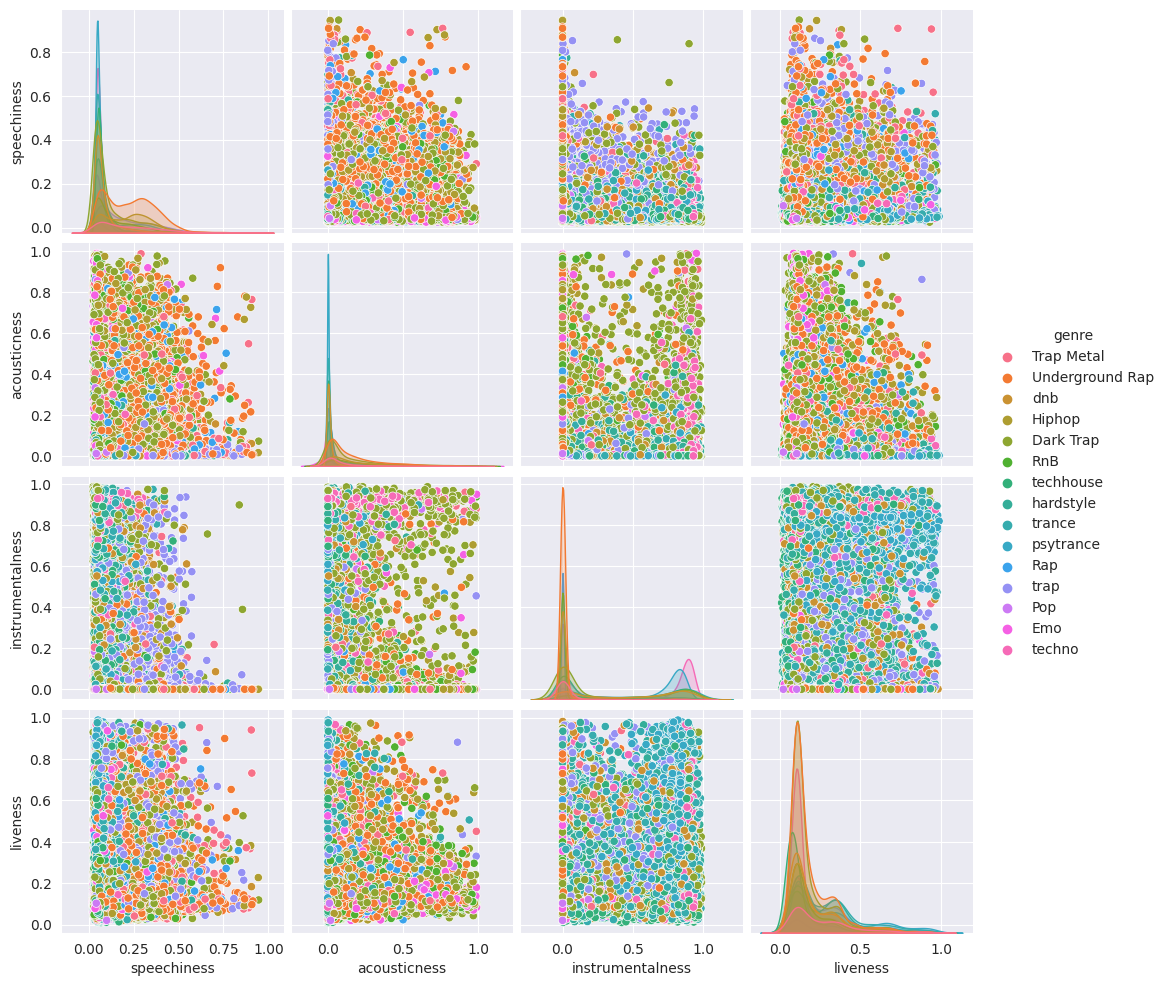

In [38]:
columns = ['speechiness','acousticness', 'instrumentalness', 'liveness','genre']
sns.pairplot(data=df[columns], hue='genre')

In [39]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [85]:
# df = df.drop(['id','time_signature', 'key'], axis=1)

KeyError: "['time_signature', 'key'] not found in axis"

In [40]:
df = df.drop(['type', 'id'], axis=1)

In [41]:
df.sample(5)

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,signature_1,signature_3,signature_4,signature_5
12018,0.745,0.696,-5.870,0,0.0622,0.01130,0.01020,0.0746,0.4330,130.071,...,False,False,False,False,True,False,False,False,True,False
27666,0.636,0.928,-4.079,0,0.1640,0.00139,0.27800,0.0919,0.0464,149.969,...,False,False,False,False,True,False,False,False,True,False
19900,0.359,0.669,-7.714,1,0.0402,0.32100,0.00262,0.1050,0.1530,130.185,...,False,False,False,False,False,False,False,False,True,False
17527,0.815,0.650,-7.265,1,0.0506,0.00374,0.88400,0.0768,0.4480,124.006,...,False,False,False,True,False,False,False,False,True,False
5077,0.661,0.871,-1.609,0,0.2640,0.00279,0.85900,0.1230,0.1570,172.019,...,False,False,True,False,False,False,False,False,True,False


In [42]:
def tt_split(df):
    X = df.loc[:, df.columns != 'genre']
    y = df.loc[:, 'genre']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)
    return X_train, X_test, y_train, y_test

### LDA

In [88]:
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', LinearDiscriminantAnalysis(solver='lsqr')))
pipeline = Pipeline(steps=steps)

# define the evaluation procedure
cv = StratifiedKFold(n_splits=10)

In [89]:
# Tuning solver
grid = dict()
grid['model__solver'] = ['svd', 'lsqr', 'eigen']

search = GridSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print(results.best_score_, results.best_params_)

NameError: name 'X_train' is not defined

In [90]:
df.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,signature_1,signature_3,signature_4,signature_5
0,0.421,0.582,-8.257,1,0.0531,0.19800,0.377000,0.149,0.0763,135.763,...,False,False,False,False,False,False,False,False,True,False
1,0.537,0.518,-5.987,1,0.1880,0.11800,0.000000,0.146,0.4270,132.527,...,False,False,False,False,False,False,False,False,True,False
2,0.568,0.782,-4.650,1,0.0381,0.00123,0.000001,0.336,0.3850,174.014,...,False,False,False,False,False,False,False,False,True,False
3,0.664,0.738,-9.461,0,0.2980,0.09920,0.000004,0.101,0.7290,180.062,...,False,False,True,False,False,False,False,False,True,False
4,0.298,0.756,-6.061,0,0.0669,0.04300,0.000083,0.223,0.1740,159.783,...,False,False,False,False,False,True,False,False,True,False


In [178]:
# Tuning shrinkage
grid = dict()
grid['model__shrinkage'] = arange(0, 1, 0.01)

search = GridSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print(results.best_score_, results.best_params_)

0.5343015035613858 {'model__shrinkage': 0.0}


In [95]:
def preprocessing(X, y, scaler=None):    
    # We scale all the columns
    if scaler is None: 
        # We only want the scaler to fit the train data
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X) # to prevent data leakage
    else: 
        X = scaler.transform(X) 
    return X, y, scaler

In [94]:
def confusion(true, pred):
    """
    Function for pretty printing confusion matrices
    """
    true.name = 'target'
    pred.name = 'predicted'
    cm = pd.crosstab(true.reset_index(drop=True), pred.reset_index(drop=True))
    cm = cm[cm.index]
    return cm

In [93]:
# obtaining accuracy for test data
X_train, X_test, y_train, y_test = tt_split(df)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = LinearDiscriminantAnalysis(solver='svd')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

ValueError: could not convert string to float: 'audio_features'

### QDA

In [12]:
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', QuadraticDiscriminantAnalysis()))
pipeline = Pipeline(steps=steps)

# Tuning regularization
grid = dict()
grid['model__reg_param'] = arange(0, 1, 0.01)

search = GridSearchCV(pipeline, grid, scoring='accuracy', cv=cv, n_jobs=-1)
results = search.fit(X_train, y_train)
print(results.best_score_, results.best_params_)

ValueError: 
All the 1000 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1000 fits failed with the following error:
Traceback (most recent call last):
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py", line 427, in fit
    return self.partial_fit(X, y)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py", line 466, in partial_fit
    X = self._validate_data(
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/utils/validation.py", line 810, in check_array
    array = array.astype(new_dtype)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/internals/managers.py", line 451, in astype
    return self.apply(
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/dtypes/astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/dtypes/astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/dtypes/astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'audio_features'


In [189]:
# obtaining accuracy for test data
X_train, X_test, y_train, y_test = tt_split(df)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.6263935340022296

### k-NN

In [76]:
# define the pipeline
steps = list()
steps.append(('scaler', MinMaxScaler()))
steps.append(('model', KNeighborsClassifier()))
pipeline = Pipeline(steps=steps)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid={
        'model__n_neighbors': [1, 3, 5, 7, 10, 15, 20],
        'model__metric': ['euclidean', 'minkowski', 'manhattan']
    },
    scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'],
    refit=False
)

grid.fit(X_train, y_train)


ValueError: 
All the 105 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
105 fits failed with the following error:
Traceback (most recent call last):
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/joblib/memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/pipeline.py", line 893, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/base.py", line 881, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py", line 427, in fit
    return self.partial_fit(X, y)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/preprocessing/_data.py", line 466, in partial_fit
    X = self._validate_data(
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/base.py", line 565, in _validate_data
    X = check_array(X, input_name="X", **check_params)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/sklearn/utils/validation.py", line 810, in check_array
    array = array.astype(new_dtype)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/generic.py", line 6324, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/internals/managers.py", line 451, in astype
    return self.apply(
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/internals/blocks.py", line 511, in astype
    new_values = astype_array_safe(values, dtype, copy=copy, errors=errors)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/dtypes/astype.py", line 242, in astype_array_safe
    new_values = astype_array(values, dtype, copy=copy)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/dtypes/astype.py", line 187, in astype_array
    values = _astype_nansafe(values, dtype, copy=copy)
  File "/home/arina/GitProjects/Spotify_Songs_Classification/venv/lib/python3.8/site-packages/pandas/core/dtypes/astype.py", line 138, in _astype_nansafe
    return arr.astype(dtype, copy=True)
ValueError: could not convert string to float: 'audio_features'


In [195]:
results_cv = pd.DataFrame(grid.cv_results_)

In [198]:
cols = ['param_model__n_neighbors', 'param_model__metric',
     'mean_test_accuracy',
    'mean_test_f1_macro', 'mean_test_precision_macro',
    'mean_test_recall_macro', 
    'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
    'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

,param_model__n_neighbors,param_model__metric,mean_test_accuracy,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,std_test_accuracy,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro
18,10,manhattan,0.601965,0.545494,0.565583,0.548174,0.008018,0.007433,0.007540,0.007376
17,7,manhattan,0.594544,0.544942,0.558581,0.546942,0.006079,0.005928,0.006430,0.005864
19,15,manhattan,0.606355,0.544322,0.571079,0.548010,0.007024,0.003721,0.005047,0.004455
20,20,manhattan,0.606738,0.543333,0.579436,0.546368,0.004955,0.002222,0.003841,0.002402
16,5,manhattan,0.584649,0.538232,0.547462,0.540639,0.005380,0.003468,0.003961,0.002806
11,10,minkowski,0.579457,0.523273,0.543280,0.525268,0.005327,0.003735,0.004374,0.003965
4,10,euclidean,0.579457,0.523273,0.543280,0.525268,0.005327,0.003735,0.004374,0.003965
15,3,manhattan,0.563116,0.521624,0.535378,0.522487,0.007523,0.006068,0.007621,0.005260
10,7,minkowski,0.572698,0.521311,0.535526,0.522799,0.006382,0.005635,0.005328,0.005771
3,7,euclidean,0.572698,0.521311,0.535526,0.522799,0.006382,0.005635,0.005328,0.005771


In [ ]:
cols = ['param_n_neighbors', 'param_metric',
     'mean_test_accuracy',
    'mean_test_f1_macro', 'mean_test_precision_macro',
    'mean_test_recall_macro', 
    'std_test_accuracy', 'std_test_f1_macro', 'std_test_precision_macro',
    'std_test_recall_macro'
]
results_cv[cols].sort_values(by='mean_test_f1_macro',ascending=False)

In [199]:
# obtaining accuracy for test data
X_train, X_test, y_train, y_test = tt_split(df)
X_train, y_train, scaler = preprocessing(X_train,y_train)
X_test, y_test, _ = preprocessing(X_test,y_test,scaler)

model = KNeighborsClassifier(n_neighbors=10, metric='manhattan')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

/home/sayyor/.local/share/virtualenvs/race-charts-3Ukbqb5o/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.6061872909698997

### Gaussian Naive Bayes

### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, make_scorer, f1_score, recall_score
from sklearn import metrics
from scipy.stats import randint

In [69]:
X_train, X_test, y_train, y_test = tt_split(df)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=RANDOM_STATE)

X_train.shape, X_val.shape, X_test.shape

((21525, 27), (7176, 27), (7176, 27))

In [70]:
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# dot_data = export_graphviz(model_tree, out_file=None,
#                            feature_names=[],
#                            class_names=[],
#                            filled=True,
#                            rounded=True,
#                            special_characters=True,
#                            rotate=True,
#                            proportion=True,
#                            max_depth=5
#                            )
# graph = graphviz.Source(dot_data)
# graph

In [64]:
y_pred = model_tree.predict(X_val)

In [66]:
print(classification_report(y_val, y_pred))

                 precision    recall  f1-score   support

      Dark Trap       0.43      0.45      0.44       914
            Emo       0.57      0.55      0.56       343
         Hiphop       0.30      0.29      0.29       465
            Pop       0.16      0.16      0.16        79
            Rap       0.35      0.35      0.35       250
            RnB       0.29      0.29      0.29       377
     Trap Metal       0.22      0.24      0.23       240
Underground Rap       0.43      0.41      0.42      1007
            dnb       0.92      0.93      0.93       504
      hardstyle       0.74      0.79      0.76       471
      psytrance       0.87      0.87      0.87       526
      techhouse       0.76      0.77      0.76       443
         techno       0.74      0.73      0.74       527
         trance       0.73      0.73      0.73       557
           trap       0.70      0.64      0.67       473

       accuracy                           0.58      7176
      macro avg       0.55   

In [67]:
print('Tree depth: {}\nNodes: {}'.format(model_tree.tree_.max_depth, model_tree.tree_.node_count))

Tree depth: 32
Nodes: 10539


#### Tuning Decision tree model

In [82]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted')
}

In [83]:
model_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(model_tree, param_grid=param_grid, scoring=scoring, cv=5, return_train_score=False, refit='f1_weighted')


In [ ]:
# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [85]:
# The best params found are:
best_params

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [86]:
y_pred = grid_search.predict(X_val)

In [87]:
print(classification_report(y_val, y_pred))

                 precision    recall  f1-score   support

      Dark Trap       0.51      0.46      0.49       914
            Emo       0.49      0.56      0.52       343
         Hiphop       0.38      0.35      0.36       465
            Pop       0.14      0.01      0.02        79
            Rap       0.91      0.26      0.40       250
            RnB       0.35      0.36      0.36       377
     Trap Metal       0.36      0.22      0.27       240
Underground Rap       0.45      0.63      0.52      1007
            dnb       0.95      0.92      0.94       504
      hardstyle       0.73      0.79      0.76       471
      psytrance       0.90      0.88      0.89       526
      techhouse       0.77      0.83      0.80       443
         techno       0.82      0.77      0.79       527
         trance       0.73      0.79      0.76       557
           trap       0.74      0.65      0.69       473

       accuracy                           0.62      7176
      macro avg       0.62   

### Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
# RandomForestClassifier with default options
model_rf = RandomForestClassifier(oob_score=True)
model_rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True)

In [92]:
y_pred = model_rf.predict(X_val)
print(classification_report(y_val, y_pred))

                 precision    recall  f1-score   support

      Dark Trap       0.56      0.57      0.56       914
            Emo       0.71      0.75      0.73       343
         Hiphop       0.50      0.37      0.43       465
            Pop       0.45      0.06      0.11        79
            Rap       0.74      0.29      0.41       250
            RnB       0.50      0.42      0.45       377
     Trap Metal       0.51      0.25      0.33       240
Underground Rap       0.48      0.69      0.57      1007
            dnb       0.95      0.98      0.96       504
      hardstyle       0.84      0.90      0.86       471
      psytrance       0.93      0.94      0.93       526
      techhouse       0.84      0.87      0.85       443
         techno       0.86      0.86      0.86       527
         trance       0.81      0.87      0.84       557
           trap       0.82      0.75      0.79       473

       accuracy                           0.70      7176
      macro avg       0.70   

In [97]:
print('OOB accuracy=', model_rf.oob_score_)

OOB accuracy= 0.6846922183507549


### Tune RandomForest

In [99]:
model_rf = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10],
    'class_weight': [None, 'balanced', 'balanced_subsample']
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_weighted': make_scorer(f1_score, average='weighted'),
    'recall_weighted': make_scorer(recall_score, average='weighted')
}

In [100]:
grid_search_rf = GridSearchCV(estimator=model_rf,
                              scoring=scoring,
                              param_grid=param_grid,
                              cv=5,
                              return_train_score=False,
                              refit=False,
                              n_jobs=-1)

In [101]:
model_rf_grid = grid_search_rf.fit(X_train, y_train)

In [111]:
best_params = pd.DataFrame(model_rf_grid.cv_results_).sort_values(by="mean_test_recall_weighted", ascending=False)[['params']].iloc[0,0]
best_params

{'class_weight': 'balanced',
 'max_depth': None,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [112]:
model_rf_tuned = RandomForestClassifier(**best_params)
model_rf_tuned.fit(X_train, y_train)
y_pred = model_rf_tuned.predict(X_val)
print(classification_report(y_val, y_pred))

                 precision    recall  f1-score   support

      Dark Trap       0.60      0.51      0.55       914
            Emo       0.68      0.74      0.71       343
         Hiphop       0.49      0.43      0.46       465
            Pop       0.47      0.19      0.27        79
            Rap       0.63      0.31      0.41       250
            RnB       0.46      0.48      0.47       377
     Trap Metal       0.47      0.38      0.42       240
Underground Rap       0.51      0.65      0.57      1007
            dnb       0.94      0.98      0.96       504
      hardstyle       0.84      0.88      0.86       471
      psytrance       0.93      0.93      0.93       526
      techhouse       0.82      0.86      0.84       443
         techno       0.84      0.86      0.85       527
         trance       0.80      0.86      0.82       557
           trap       0.81      0.78      0.79       473

       accuracy                           0.70      7176
      macro avg       0.69   